In [19]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import svm

from imblearn.over_sampling import SMOTE

In [20]:
bin_df = pd.read_pickle('./bin_df.pkl')

In [21]:
X = bin_df['string_tokens']
y = bin_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, stratify = y)

In [22]:
vectorizer = TfidfVectorizer()

X_train_vect = vectorizer.fit_transform(X_train)

X_test_vect = vectorizer.transform(X_test)

In [23]:
k_neighbors = KNeighborsClassifier()

k_neighbors.fit(X_train_vect, y_train)

KNeighborsClassifier()

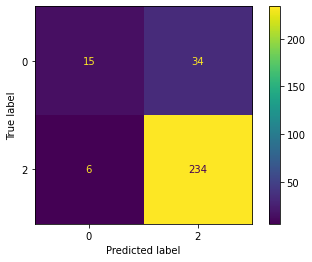

In [24]:
plot_confusion_matrix(k_neighbors, X_test_vect, y_test)

In [25]:
rfc = RandomForestClassifier()

rfc.fit(X_train_vect, y_train)

RandomForestClassifier()

In [26]:
y_preds = rfc.predict(X_test_vect)

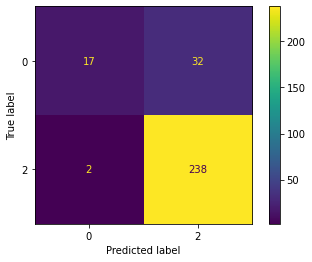

In [27]:
plot_confusion_matrix(rfc, X_test_vect, y_test)

In [28]:
svcl = svm.SVC()
svcl.fit(X_train_vect, y_train)
svcl_score = svcl.score(X_test_vect, y_test)
print("Results for Support Vector Machine with TFIDF-Vectorizer")
print(svcl_score)
y_pred_sv = svcl.predict(X_test_vect)

Results for Support Vector Machine with TFIDF-Vectorizer
0.8581314878892734


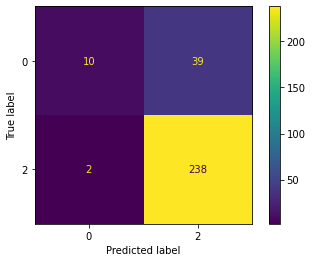

In [29]:
plot_confusion_matrix(svcl, X_test_vect, y_test)

In [30]:
print(classification_report(y_pred_sv, y_test))

              precision    recall  f1-score   support

           0       0.20      0.83      0.33        12
           2       0.99      0.86      0.92       277

    accuracy                           0.86       289
   macro avg       0.60      0.85      0.62       289
weighted avg       0.96      0.86      0.90       289



In [31]:
cnb = ComplementNB()

cnb.fit(X_train_vect, y_train)

y_preds_mnb = cnb.predict(X_test_vect)

In [32]:
print(classification_report(cnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.51      0.61      0.56        41
           2       0.93      0.90      0.92       248

    accuracy                           0.86       289
   macro avg       0.72      0.76      0.74       289
weighted avg       0.87      0.86      0.87       289



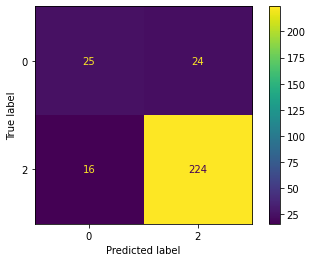

In [33]:
plot_confusion_matrix(cnb, X_test_vect, y_test)

In [34]:
gboost = GradientBoostingClassifier()

gboost.fit(X_train_vect, y_train)

y_preds_gboost = gboost.predict(X_test_vect)

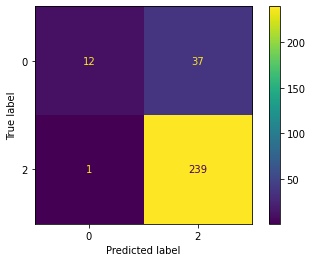

In [35]:
plot_confusion_matrix(gboost, X_test_vect, y_test)

In [36]:
oversample = SMOTE()
X_train_vect_smote, y_smote = oversample.fit_resample(X_train_vect, y_train)